In [392]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

url = 'marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

In [393]:
# Separate the columns
categoricals_df = df.select_dtypes(include='object')
numericals_df = df.select_dtypes(include='number')

## Categorical

In [394]:
# Create new Dataframes splitt in nominal and ordinal
nominal_columns = ['state', 'response', 'employmentstatus', 'gender', 
                   'location_code', 'marital_status', 'policy_type', 
                   'sales_channel', 'policy','vehicle_class', 'vehicle_type', 'renew_offer_type']
nominal_df = categoricals_df[nominal_columns]

In [395]:
# Create new Dataframes splitt in nominal and ordinal
ordinal_columns = ['coverage','education', 'vehicle_size']
ordinal_df = categoricals_df[ordinal_columns]

In [396]:
# get_dummies with all the norminal columns
con_norminals_df = pd.get_dummies(nominal_df, dtype=int)
con_norminals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
10906,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


In [397]:
# For 'coverage' column
enc = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])
ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])

# For 'education' column
enc = OrdinalEncoder(categories=[['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])
ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])

# For 'vehicle_size' column
enc = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])
ordinal_df['vehicle_size'] = enc.fit_transform(ordinal_df[['vehicle_size']])

C:\Users\vonke\AppData\Local\Temp\ipykernel_5708\2652735968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['coverage'] = enc.fit_transform(ordinal_df[['coverage']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_5708\2652735968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_df['education'] = enc.fit_transform(ordinal_df[['education']])
C:\Users\vonke\AppData\Local\Temp\ipykernel_5708\2652735968.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [398]:
# Concat the two categorical Dataframes

result_categorical_df = pd.concat([ordinal_df, con_norminals_df], axis=1)
result_categorical_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0


## Numberical

In [399]:
# Drop NAN and duplicates
numericals_df = numericals_df.dropna()
numericals_df = numericals_df.drop_duplicates()


## Concat both

In [400]:
final_df = pd.concat([result_categorical_df, numericals_df], axis=1)
final_df = final_df.drop(columns=['month', 'unnamed:_0'])
final_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,renew_offer_type_Offer3,renew_offer_type_Offer4,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,2.0,1.0,1,0,0,0,0,1,0,...,1,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000
1,0.0,2.0,1.0,0,1,0,0,0,1,0,...,0,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331
2,0.0,1.0,1.0,0,0,0,0,1,1,0,...,1,0,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,0,0,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411
4,2.0,1.0,1.0,0,0,0,1,0,1,0,...,0,0,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,1,0,...,1,0,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000
10906,0.0,2.0,1.0,0,0,0,1,0,1,0,...,0,0,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929
10907,1.0,1.0,1.0,1,0,0,0,0,1,0,...,0,0,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996
10908,2.0,2.0,1.0,0,1,0,0,0,1,0,...,0,0,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849


### X-y Splitt

In [401]:
final_df.columns

Index(['coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'vehicle_class_Four-Door Ca

In [402]:
X = final_df[['coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'policy_Corporate L1', 'policy_Corporate L2',
       'policy_Corporate L3', 'policy_Personal L1', 'policy_Personal L2',
       'policy_Personal L3', 'policy_Special L1', 'policy_Special L2',
       'policy_Special L3', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']]
y = final_df[['total_claim_amount']]

### Train test split

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

### Standardize the data (after the data split!)

In [404]:
# MinMaxScaler X_train
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [405]:
# MinMaxScaler X_test
X_test = scaler.transform(X_test)

In [406]:
#PowerTransform y_train
pt = PowerTransformer()
y_train = pt.fit_transform(y_train)

In [407]:
#PowerTransform y_test
y_test = pt.transform(y_test)

### Apply linear regression

In [408]:
ln = LinearRegression()
model = ln.fit(X_train, y_train)

In [409]:
model.coef_

array([[ 3.69020760e-02, -7.79736350e-02, -4.34022862e-02,
        -5.14499149e+12, -5.14499149e+12, -5.14499149e+12,
        -5.14499149e+12, -5.14499149e+12, -1.76097348e+11,
        -1.76097348e+11, -9.07906390e+12, -9.07906390e+12,
        -9.07906390e+12, -9.07906390e+12, -9.07906390e+12,
         3.94116397e+12,  3.94116397e+12, -5.81760383e+12,
        -5.81760383e+12, -5.81760383e+12, -2.37710845e+13,
        -2.37710845e+13, -2.37710845e+13, -6.49334299e+12,
        -8.65485213e+12, -8.30030116e+12,  5.16110972e+12,
         5.16110972e+12,  5.16110972e+12,  5.16110972e+12,
        -2.33439018e+12, -2.33439018e+12, -2.33439018e+12,
        -1.72881032e+11, -1.72881032e+11, -1.72881032e+11,
        -5.27432002e+11, -5.27432002e+11, -5.27432002e+11,
        -1.81633170e+12, -1.81633170e+12, -1.81633170e+12,
        -1.81633170e+12, -1.81633170e+12, -1.81633170e+12,
         0.00000000e+00,  7.98687911e+12,  7.98687911e+12,
         7.98687911e+12,  7.98687911e+12,  1.75781250e-0

In [410]:
model.intercept_

array([3.75437531e+13])

### Create predictions for the test set

In [411]:
y_pred = model.predict(X_test)

In [412]:
# inverse transforming predictions
pt.inverse_transform(y_pred)

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


array([[380.26366439],
       [417.21946058],
       [499.19077267],
       ...,
       [ 77.04830526],
       [484.57196142],
       [ 45.6348544 ]])

In [413]:
y_pred = pd.DataFrame(y_pred)

In [414]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)

In [415]:
y_test = y_test.rename(columns={0: 'y_test'})

In [416]:
residuals_df = pd.concat([y_test,y_pred], axis=1)

In [417]:
residuals_df = residuals_df.rename(columns={0: 'y_pred'})

In [418]:
residuals_df['residual'] = residuals_df['y_test'] - residuals_df['y_pred']

In [419]:
residuals_df

,y_test,y_pred,residual
0,0.321838,-0.007812,0.329651
1,-0.120340,0.125000,-0.245340
2,0.344533,0.398438,-0.053904
3,0.907717,0.578125,0.329592
4,-0.312689,-0.132812,-0.179877
...,...,...,...
2723,0.271899,0.500000,-0.228101
2724,0.084963,0.070312,0.014651
2725,-1.959038,-1.593750,-0.365288
2726,-0.065458,0.351562,-0.417020


### Calculating metrics

In [420]:
mean_error = residuals_df['residual'].mean()
mean_error

-0.0006881198402418015

In [421]:

mse(y_test, y_pred)

0.17133860914699203

In [422]:
np.sqrt(mse(y_test, y_pred))

0.41393068157240054

In [423]:
rmse = mse(y_test, y_pred, squared=False)
rmse

0.41393068157240054

### Computing R2_score for test_set

In [424]:
r2_test = round(r2_score(y_test, y_pred), 2)
r2_test

0.83

### Computing R2_score for train_set

In [425]:
y_pred_train = pd.DataFrame(model.predict(X_train))
r2_train = round(r2_score(y_train, y_pred_train), 2)
r2_train

0.83

### Test

In [426]:
features_names = list(X)
features_names

['coverage',
 'education',
 'vehicle_size',
 'state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'employmentstatus_Disabled',
 'employmentstatus_Employed',
 'employmentstatus_Medical Leave',
 'employmentstatus_Retired',
 'employmentstatus_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'sales_channel_Agent',
 'sales_channel_Branch',
 'sales_channel_Call Center',
 'sales_channel_Web',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Corporate L3',
 'policy_Personal L1',
 'policy_Personal L2',
 'policy_Personal L3',
 'policy_Special L1',
 'policy_Special L2',
 'policy_Special L3',
 'vehicle_class_Four-Door Car',
 'vehicle_class_Luxury Car',
 'vehicle_class_Luxury SUV',
 'v

In [427]:
coefficients = model.coef_
coefficients = [i for i in coefficients[0]]

In [428]:
fi_dict = {'name':features_names, 'coeff':coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,coverage,3.690208e-02
1,education,-7.797363e-02
2,vehicle_size,-4.340229e-02
3,state_Arizona,-5.144991e+12
4,state_California,-5.144991e+12
5,state_Nevada,-5.144991e+12
6,state_Oregon,-5.144991e+12
7,state_Washington,-5.144991e+12
8,response_No,-1.760973e+11
9,response_Yes,-1.760973e+11


In [429]:
fi_df = fi_df.sort_values(by='coeff', ascending=False)

<Axes: xlabel='coeff', ylabel='name'>

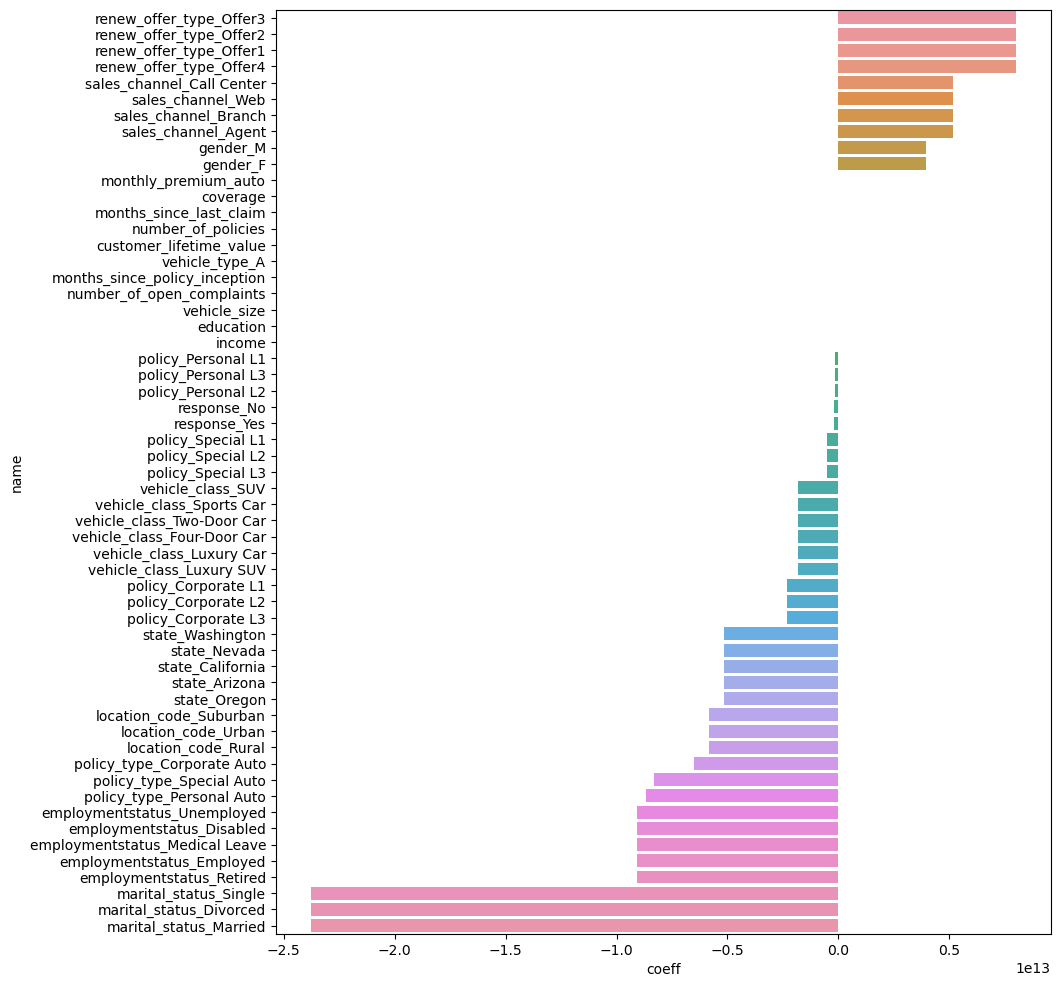

In [430]:
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])